
# 📘 Projeto 1 - Teoria e Aplicação de Grafos (TAG) - 2025/2
**Universidade de Brasília - Departamento de Ciência da Computação**  
**Professor:** Díbio  
**Tema:** Análise de Rede Social do Facebook  
**Integrantes:**  
- Gustavo Choueiri - 232014010  
- Giovanni Daldegan - 232002520  

---
Este notebook realiza a análise de uma rede social (Facebook), utilizando conceitos de **Teoria dos Grafos**.
As etapas seguem rigorosamente as instruções do projeto:

1. Coleta de dados (2000 nós aleatórios)  
2. Construção e análise do grafo  
3. Detecção de comunidades (Louvain)  
4. Cálculo de medidas de centralidade  
5. Visualização dos resultados  
6. Interpretação e relatório  


In [2]:

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random, os, warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print("Bibliotecas carregadas com sucesso.")


Bibliotecas carregadas com sucesso.



## 🧩 Etapa 1: Coleta de Dados
Selecionamos 2000 nós aleatórios


In [ ]:

def coletar_dados_facebook(diretorio_dados="dados_facebook", num_nos=2000):
    arquivos_edges = [f for f in os.listdir(diretorio_dados) if f.endswith('.edges')]
    todos_nos, todas_arestas = set(), []

    for arquivo in arquivos_edges:
        with open(os.path.join(diretorio_dados, arquivo), 'r') as f:
            for linha in f:
                n = linha.strip().split()
                if len(n) == 2:
                    n1, n2 = map(int, n)
                    todos_nos.update([n1, n2])
                    todas_arestas.append((n1, n2))

    random.seed(42)
    nos_sel = set(random.sample(list(todos_nos), min(num_nos, len(todos_nos))))
    arestas_filtradas = [(n1, n2) for n1, n2 in todas_arestas if n1 in nos_sel and n2 in nos_sel]

    G = nx.Graph()
    G.add_nodes_from(nos_sel)
    G.add_edges_from(arestas_filtradas)
    return G


G = coletar_dados_facebook()
G



## 🔍 Etapa 2: Análise do Grafo
Calculamos propriedades básicas do grafo


In [8]:

def analisar_grafo(G):
    componentes = list(nx.connected_components(G))
    componente_gigante = max(componentes, key=len)
    G_gigante = G.subgraph(componente_gigante).copy()
    densidade = nx.density(G_gigante)

    print(f"Nós: {G_gigante.number_of_nodes()}, Arestas: {G_gigante.number_of_edges()}, Densidade: {densidade:.4f}")
    return G_gigante

G = analisar_grafo(G)


Nós: 1765, Arestas: 21625, Densidade: 0.0139



## 🧠 Etapa 3: Detecção de Comunidades
Utilizamos o algoritmo de **Louvain** para detectar agrupamentos de usuários.


In [11]:

def detectar_comunidades(G):
    comunidades = nx.community.louvain_communities(G, seed=42)
    comunidades_dict = {no: i for i, c in enumerate(comunidades) for no in c}
    return comunidades_dict, comunidades

comunidades_dict, comunidades = detectar_comunidades(G)
comunidades_dict
comunidades


[{1,
  10,
  13,
  16,
  26,
  29,
  30,
  36,
  38,
  45,
  53,
  56,
  57,
  60,
  62,
  63,
  66,
  77,
  81,
  85,
  87,
  92,
  94,
  96,
  103,
  104,
  108,
  109,
  117,
  118,
  119,
  121,
  125,
  126,
  130,
  133,
  135,
  139,
  141,
  142,
  158,
  159,
  160,
  164,
  168,
  169,
  170,
  172,
  176,
  185,
  186,
  188,
  194,
  196,
  197,
  200,
  208,
  212,
  213,
  221,
  222,
  224,
  232,
  238,
  240,
  248,
  250,
  251,
  252,
  257,
  260,
  266,
  269,
  271,
  274,
  280,
  285,
  288,
  290,
  291,
  294,
  295,
  297,
  298,
  299,
  303,
  304,
  308,
  311,
  313,
  314,
  315,
  320,
  324,
  325,
  329,
  330,
  331,
  340,
  342,
  344,
  346,
  347},
 {348,
  349,
  357,
  360,
  362,
  363,
  365,
  369,
  371,
  375,
  385,
  387,
  388,
  389,
  390,
  394,
  396,
  397,
  398,
  402,
  404,
  410,
  411,
  412,
  413,
  416,
  418,
  420,
  421,
  423,
  424,
  426,
  428,
  429,
  432,
  433,
  434,
  435,
  436,
  438,
  439,
  448,
  449,
  


## ⚙️ Etapa 4: Medidas de Centralidade
As medidas ajudam a identificar usuários **influentes**, **mediadores** e **bem conectados**.


In [18]:

def calcular_centralidades(G):
    return {
        'grau': nx.degree_centrality(G),
        'intermediacao': nx.betweenness_centrality(G),
        'proximidade': nx.closeness_centrality(G),
        'autovetor': nx.eigenvector_centrality(G, max_iter=1000)
    }

medidas = calcular_centralidades(G)
medidas


{'grau': {1: 0.005668934240362812,
  10: 0.002834467120181406,
  13: 0.007936507936507936,
  16: 0.002834467120181406,
  26: 0.021541950113378686,
  29: 0.0022675736961451248,
  30: 0.005668934240362812,
  36: 0.002834467120181406,
  38: 0.0017006802721088437,
  45: 0.0034013605442176874,
  53: 0.007936507936507936,
  56: 0.02380952380952381,
  57: 0.002834467120181406,
  60: 0.002834467120181406,
  62: 0.006235827664399093,
  63: 0.0022675736961451248,
  66: 0.0034013605442176874,
  77: 0.0011337868480725624,
  81: 0.0005668934240362812,
  85: 0.002834467120181406,
  87: 0.002834467120181406,
  92: 0.005668934240362812,
  94: 0.005102040816326531,
  96: 0.0034013605442176874,
  103: 0.005102040816326531,
  104: 0.009070294784580499,
  107: 0.010204081632653062,
  108: 0.0034013605442176874,
  109: 0.012471655328798186,
  117: 0.0022675736961451248,
  118: 0.010204081632653062,
  119: 0.015306122448979591,
  121: 0.0017006802721088437,
  125: 0.0017006802721088437,
  126: 0.00113378684


## 🎨 Etapa 5: Visualizações
A seguir, criamos diferentes gráficos


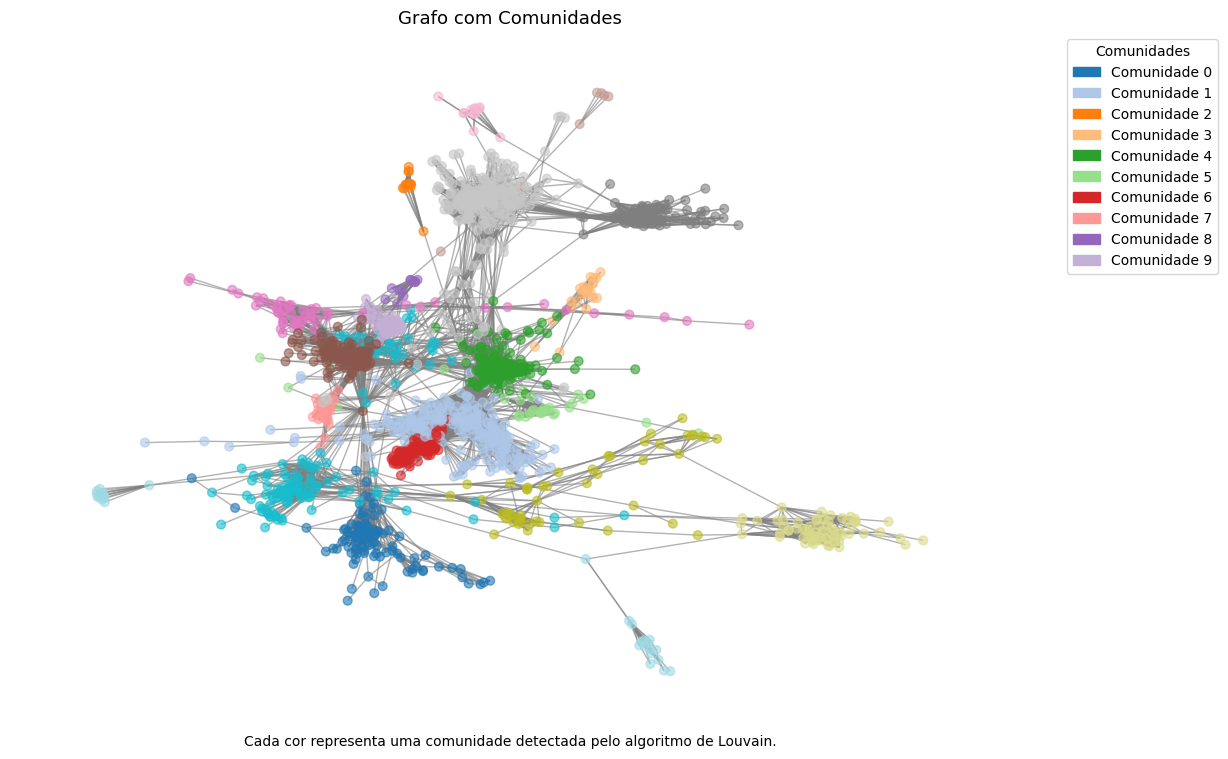

In [ ]:
import matplotlib.patches as mpatches

def visualizar_grafo_comunidades(G, comunidades_dict, titulo="Grafo com Comunidades"):

    plt.figure(figsize=(10, 7))

    comunidades_unicas = sorted(set(comunidades_dict.values()))
    num_comunidades = len(comunidades_unicas)
    cores = plt.cm.tab20(np.linspace(0, 1, num_comunidades))

    # Mapeia cada nó para a cor de sua comunidade
    cores_nos = [cores[comunidades_dict[no] % len(cores)] for no in G.nodes()]
    pos = nx.spring_layout(G, seed=42)

    nx.draw(G, pos, node_color=cores_nos, node_size=40, edge_color='gray', alpha=0.6)
    plt.title(titulo, fontsize=13)

    # Cria legendas automáticas
    patches = []
    for i, c in enumerate(comunidades_unicas[:10]):
        patches.append(mpatches.Patch(color=cores[i], label=f"Comunidade {c}"))
    plt.legend(handles=patches, title="Comunidades", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.figtext(0.5, -0.02, "Cada cor representa uma comunidade detectada pelo algoritmo de Louvain.", ha="center")
    plt.tight_layout()
    plt.show()

visualizar_grafo_comunidades(G,comunidades_dict)


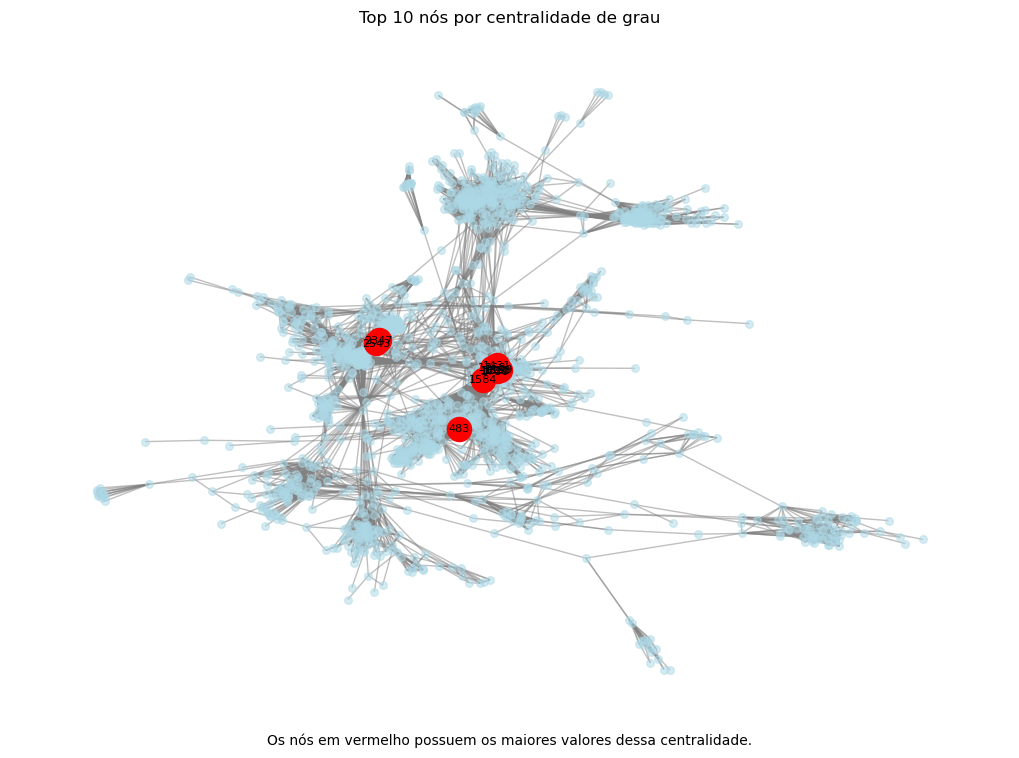

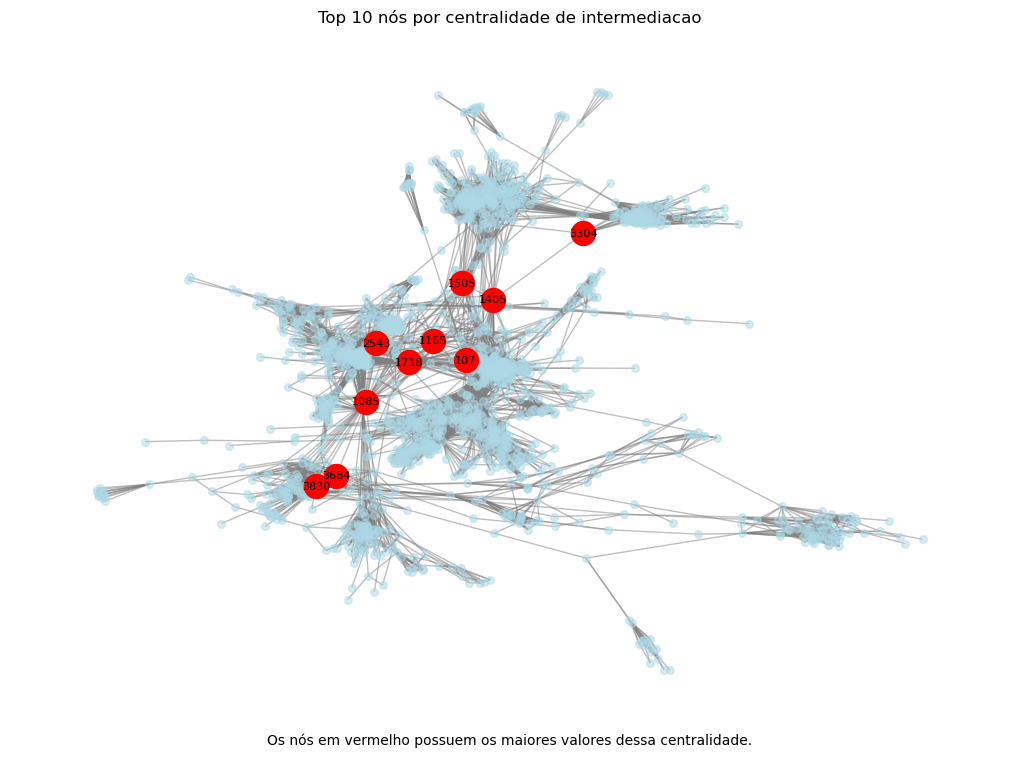

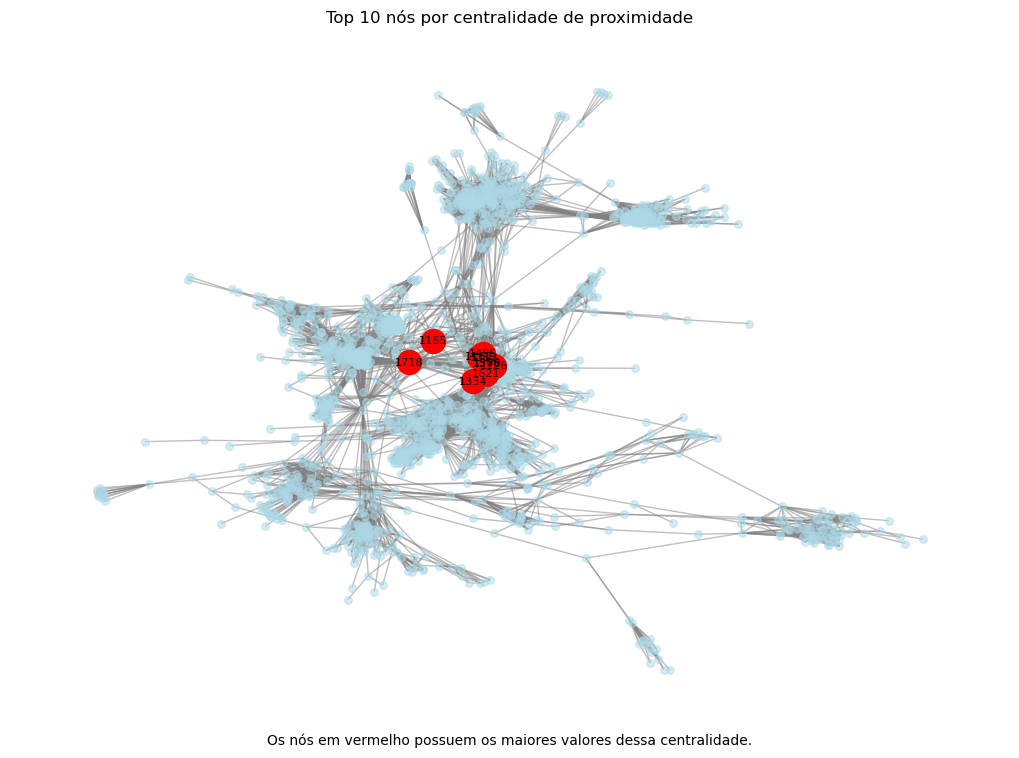

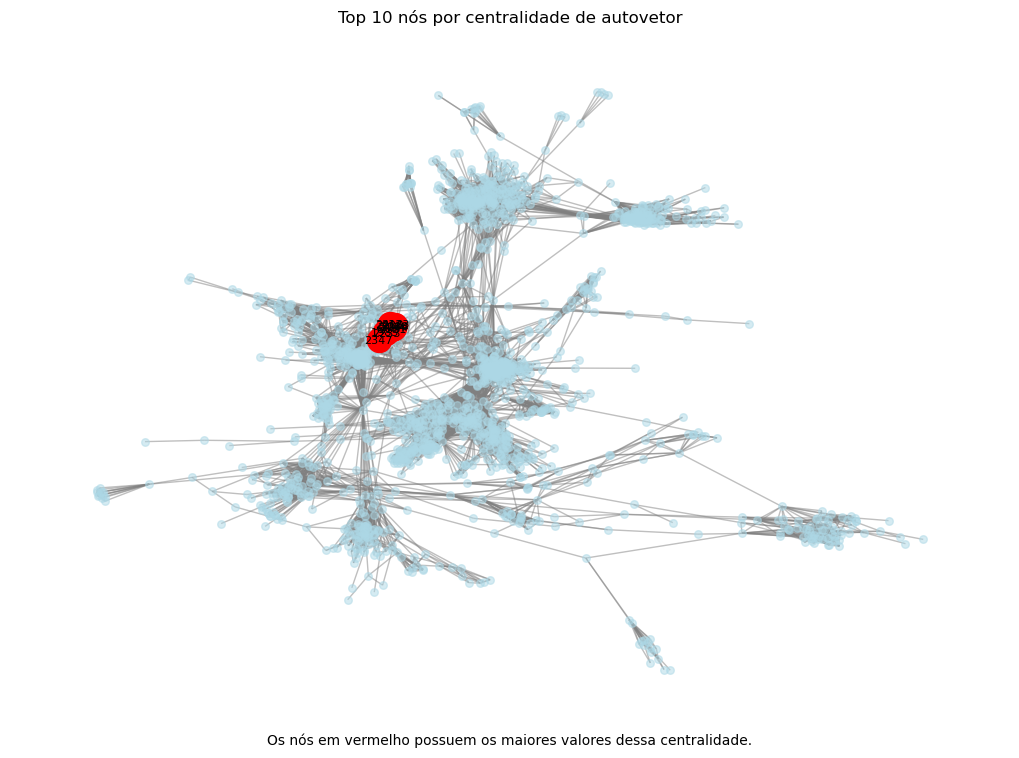

In [26]:

def visualizar_centralidade(G, medidas, tipo, top_k=10):
    valores = medidas[tipo]
    top = sorted(valores.items(), key=lambda x: x[1], reverse=True)[:top_k]
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, node_color='lightblue', node_size=30, edge_color='gray', alpha=0.5)
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n, _ in top], node_color='red', node_size=300)
    nx.draw_networkx_labels(G, pos, labels={n: f"{n}" for n, _ in top}, font_size=8)
    plt.title(f"Top {top_k} nós por centralidade de {tipo}")
    plt.figtext(0.5, -0.02, "Os nós em vermelho possuem os maiores valores dessa centralidade.", ha="center")
    plt.show()

visualizar_centralidade(G, medidas, tipo="grau")
visualizar_centralidade(G, medidas, tipo="intermediacao")
visualizar_centralidade(G, medidas, tipo="proximidade")
visualizar_centralidade(G, medidas, tipo="autovetor")


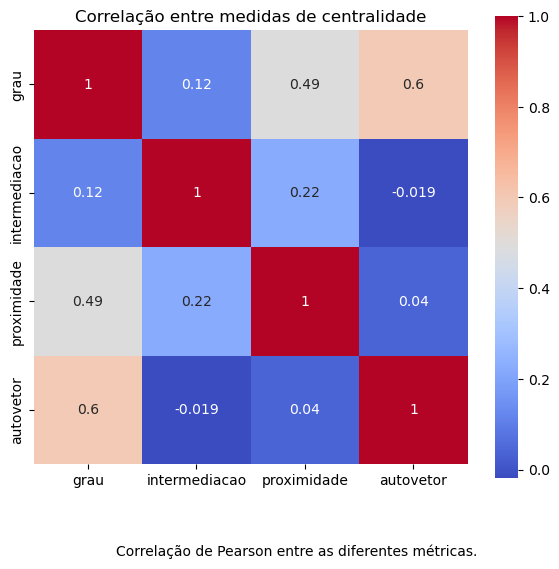

In [20]:

def heatmap_centralidades(medidas):
    df = pd.DataFrame(medidas)
    plt.figure(figsize=(7,6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", square=True)
    plt.title("Correlação entre medidas de centralidade")
    plt.figtext(0.5, -0.02, "Correlação de Pearson entre as diferentes métricas.", ha="center")
    plt.show()

heatmap_centralidades(medidas)


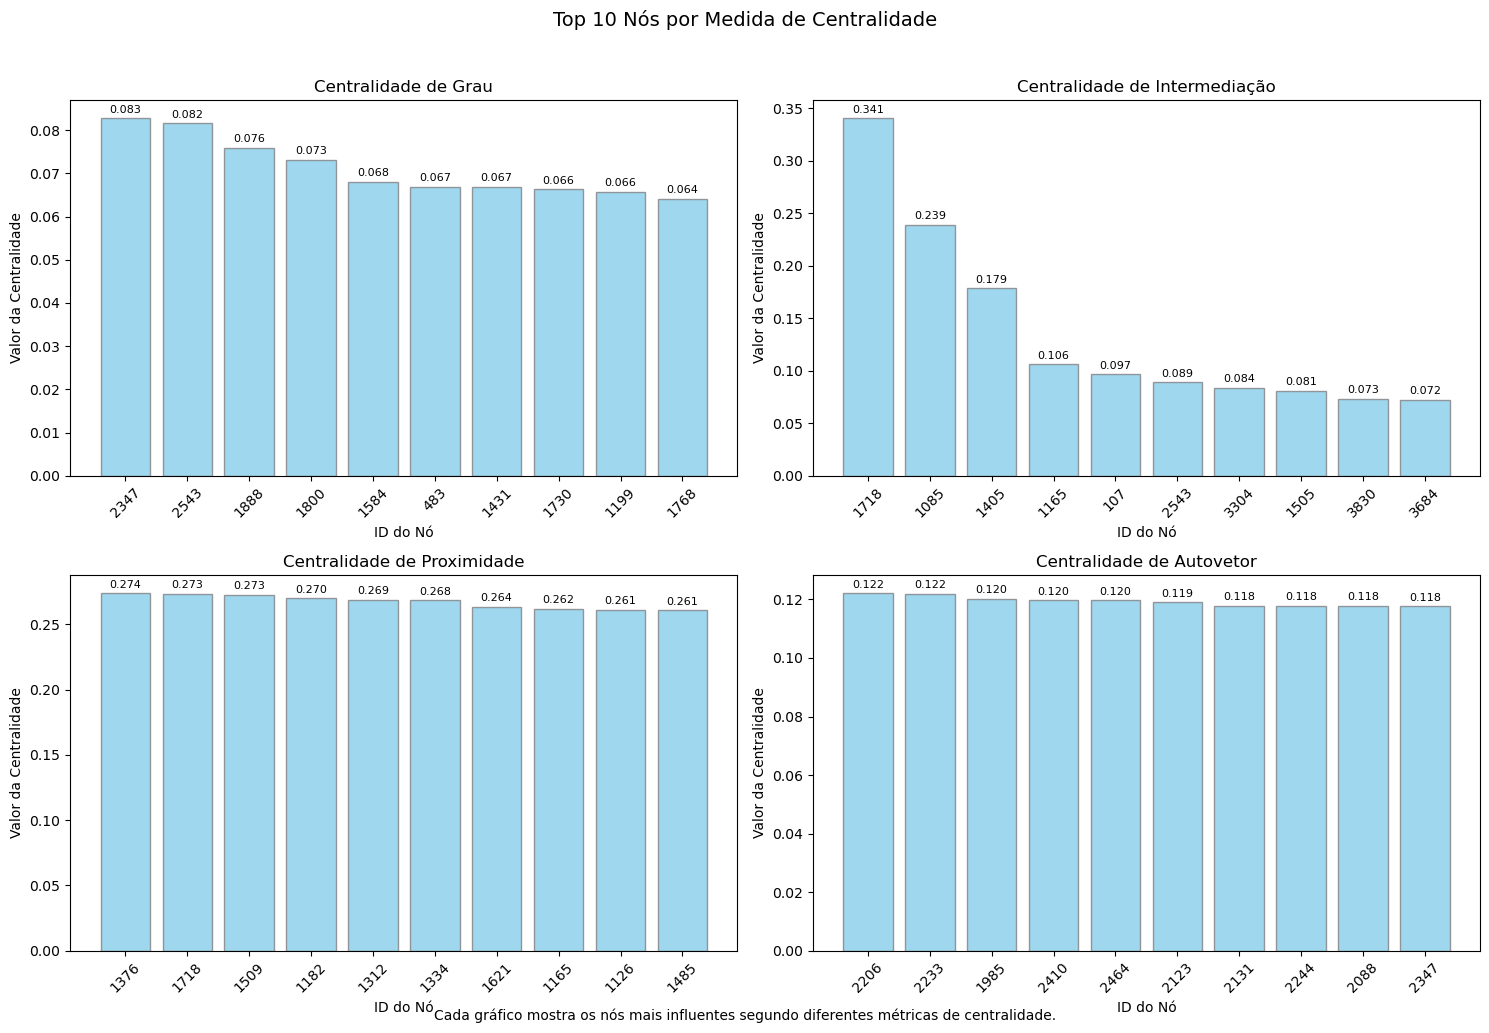

In [ ]:
def criar_grafico_barras_centralidade(medidas, top_k=10):
    """
    Cria gráfico de barras para os top nós por cada medida de centralidade.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    medidas_nomes = ['grau', 'intermediacao', 'proximidade', 'autovetor']
    titulos = [
        'Centralidade de Grau',
        'Centralidade de Intermediação',
        'Centralidade de Proximidade',
        'Centralidade de Autovetor'
    ]

    for i, (nome, titulo) in enumerate(zip(medidas_nomes, titulos)):
        top = sorted(medidas[nome].items(), key=lambda x: x[1], reverse=True)[:top_k]
        nos = [str(n) for n, _ in top]
        valores = [v for _, v in top]
        
        axes[i].bar(nos, valores, color='skyblue', alpha=0.8, edgecolor='gray')
        axes[i].set_title(titulo, fontsize=12)
        axes[i].set_xlabel('ID do Nó')
        axes[i].set_ylabel('Valor da Centralidade')
        axes[i].tick_params(axis='x', rotation=45)
        
        for j, v in enumerate(valores):
            axes[i].text(j, v + max(valores)*0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

    plt.suptitle("Top 10 Nós por Medida de Centralidade", fontsize=14, y=1.02)
    plt.figtext(0.5, 0.01, "Cada gráfico mostra os nós mais influentes segundo diferentes métricas de centralidade.", ha="center")
    plt.tight_layout()
    plt.show()

criar_grafico_barras_centralidade(medidas)



## 📊 Etapa 6: Relatório e Interpretação
Resumo textual da análise — principais nós, comunidades e interpretações qualitativas.


In [27]:
def gerar_relatorio(G, medidas, comunidades_dict, comunidades_list):
    """
    Gera um relatório.
    """
    from statistics import mean


    # Resumo geral
    display(pd.DataFrame({
        "Métrica": ["Nós", "Arestas", "Densidade", "Comunidades"],
        "Valor": [
            G.number_of_nodes(),
            G.number_of_edges(),
            round(nx.density(G), 4),
            len(comunidades_list)
        ]
    }))

    # Tamanhos das comunidades
    tamanhos = [len(c) for c in comunidades_list]
    resumo_comunidades = {
        "Maior comunidade": max(tamanhos),
        "Menor comunidade": min(tamanhos),
        "Tamanho médio": round(mean(tamanhos), 2)
    }
    print("\n Estatísticas de Comunidades:")
    for k, v in resumo_comunidades.items():
        print(f" - {k}: {v} nós")

    # Nós mais influentes por medida
    print("\n Top 5 Nós Mais Influentes por Medida:")
    for nome, valores in medidas.items():
        top5 = sorted(valores.items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"\n {nome.title()}")
        for i, (n, v) in enumerate(top5, 1):
            print(f"   {i}. Nó {n} — valor={v:.4f}, comunidade={comunidades_dict.get(n)}")


gerar_relatorio(G, medidas, comunidades_dict, comunidades)


,Métrica,Valor
0,Nós,1765.0000
1,Arestas,21625.0000
2,Densidade,0.0139
3,Comunidades,21.0000



 Estatísticas de Comunidades:
 - Maior comunidade: 278 nós
 - Menor comunidade: 7 nós
 - Tamanho médio: 84.05 nós

 Top 5 Nós Mais Influentes por Medida:

 Grau
   1. Nó 2347 — valor=0.0828, comunidade=9
   2. Nó 2543 — valor=0.0816, comunidade=10
   3. Nó 1888 — valor=0.0760, comunidade=4
   4. Nó 1800 — valor=0.0731, comunidade=4
   5. Nó 1584 — valor=0.0680, comunidade=4

 Intermediacao
   1. Nó 1718 — valor=0.3405, comunidade=10
   2. Nó 1085 — valor=0.2388, comunidade=18
   3. Nó 1405 — valor=0.1787, comunidade=4
   4. Nó 1165 — valor=0.1062, comunidade=18
   5. Nó 107 — valor=0.0965, comunidade=15

 Proximidade
   1. Nó 1376 — valor=0.2740, comunidade=4
   2. Nó 1718 — valor=0.2734, comunidade=10
   3. Nó 1509 — valor=0.2728, comunidade=4
   4. Nó 1182 — valor=0.2702, comunidade=4
   5. Nó 1312 — valor=0.2689, comunidade=4

 Autovetor
   1. Nó 2206 — valor=0.1221, comunidade=9
   2. Nó 2233 — valor=0.1219, comunidade=9
   3. Nó 1985 — valor=0.1202, comunidade=9
   4. Nó 2410 — v